In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv('E:/ML model deploy with Django/DeployMlModel/Predict Employee Promotion/train.csv')

In [6]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [7]:
df_train.shape

(54808, 13)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [9]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [10]:
df_train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [11]:
df_train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [12]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
df_train['education'] = df_train['education'].fillna(df_train['education'].mode()[0])

In [14]:
df_train['previous_year_rating'] = df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].median())

In [15]:
print('number of missing values in train data: ',df_train.isnull().sum().sum()) 

number of missing values in train data:  0


In [16]:
df_train.select_dtypes('number').columns.to_list()

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [17]:
df_train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0


## Perform EDA

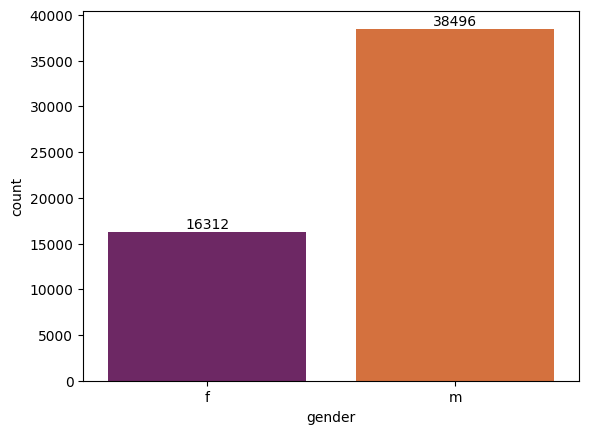

In [18]:
ax=sns.countplot(data=df_train,x='gender',palette='inferno')
for bars in ax.containers:
    ax.bar_label(bars)

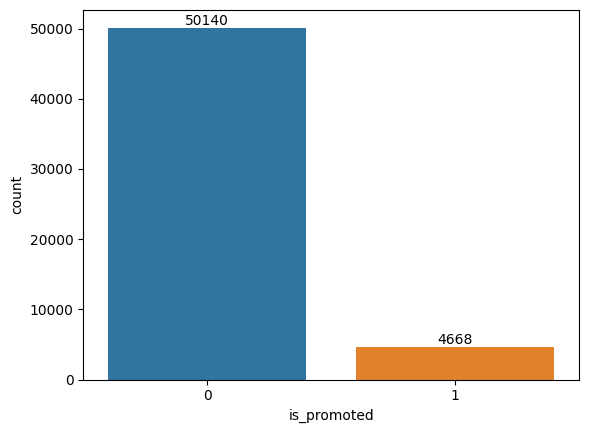

In [19]:
ax=sns.countplot(data=df_train,x='is_promoted')
for bars in ax.containers:
    ax.bar_label(bars)

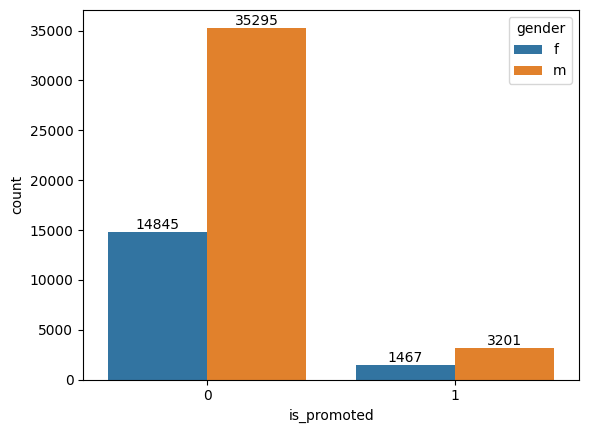

In [20]:
ax=sns.countplot(data=df_train,x='is_promoted',hue='gender')
for bars in ax.containers:
    ax.bar_label(bars)

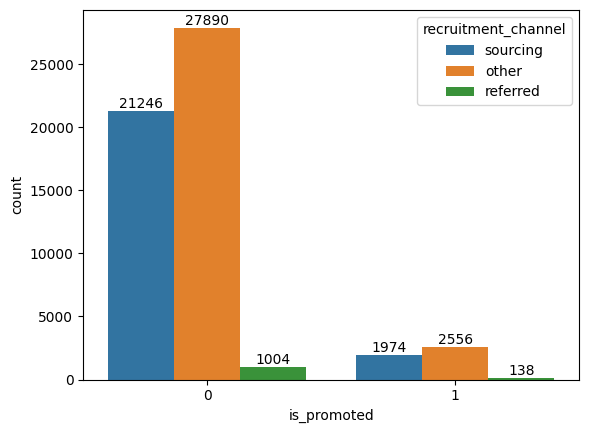

In [21]:
ax=sns.countplot(data=df_train,x='is_promoted',hue='recruitment_channel')
for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
pd.crosstab(df_train['is_promoted'],df_train['education'])

education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,35948,738,13454
1,3130,67,1471


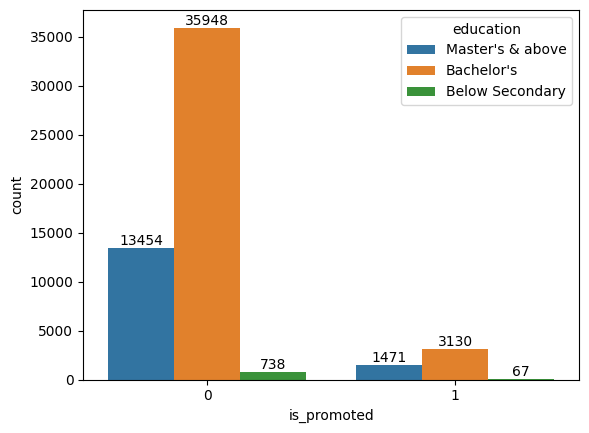

In [23]:
education = sns.countplot(data=df_train,x='is_promoted',hue='education')
for bars in education.containers:
    education.bar_label(bars)

<Axes: ylabel='length_of_service'>

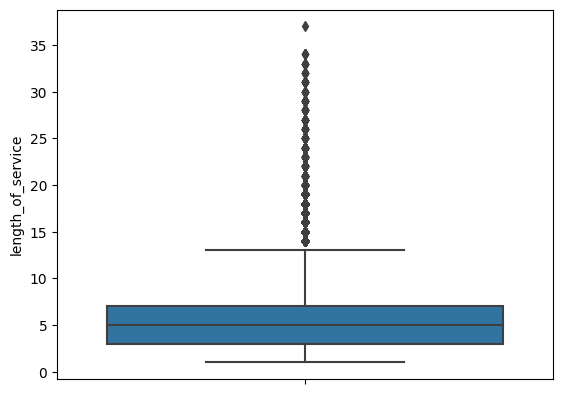

In [24]:
sns.boxplot(data=df_train,y='length_of_service')

In [25]:
df_train = df_train[(df_train['length_of_service'] <= 13)]

<Axes: ylabel='length_of_service'>

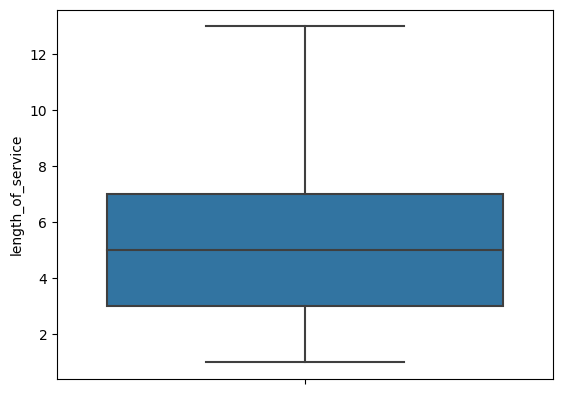

In [26]:
sns.boxplot(data=df_train,y='length_of_service')

In [27]:
pd.crosstab(df_train['is_promoted'],df_train['length_of_service'])

length_of_service,1,2,3,4,5,6,7,8,9,10,11,12,13
is_promoted,,,,,,,,,,,,,
0,4170,6089,6424,6238,5357,4333,5087,2614,2400,1989,820,731,633
1,377,595,609,598,475,401,464,269,229,204,96,63,54


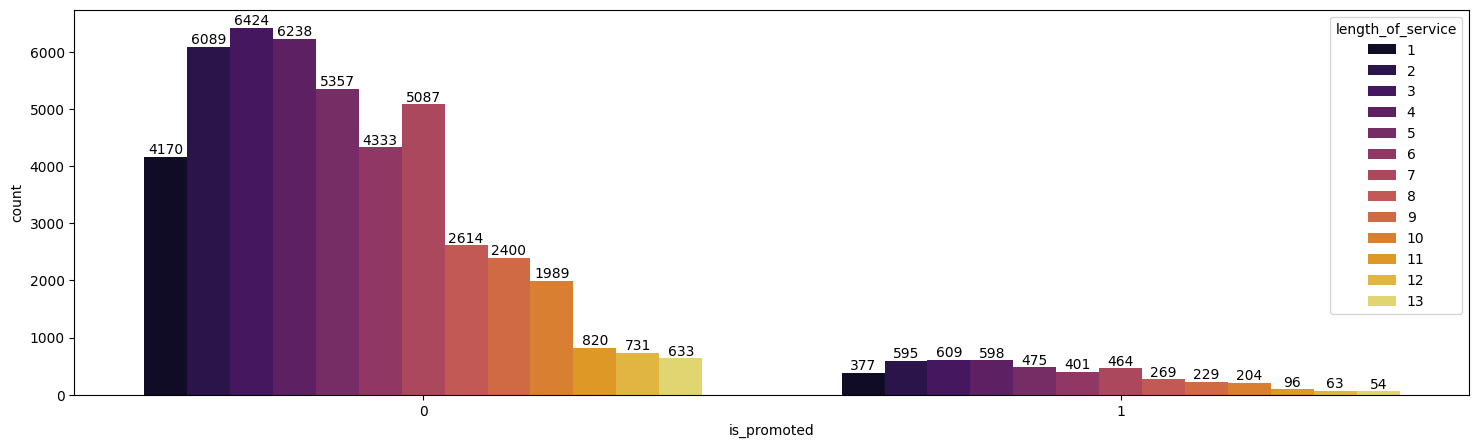

In [28]:
plt.figure(figsize=(18,5))
ax=sns.countplot(data=df_train,x='is_promoted',hue='length_of_service',palette='inferno')
for bars in ax.containers:
    ax.bar_label(bars)

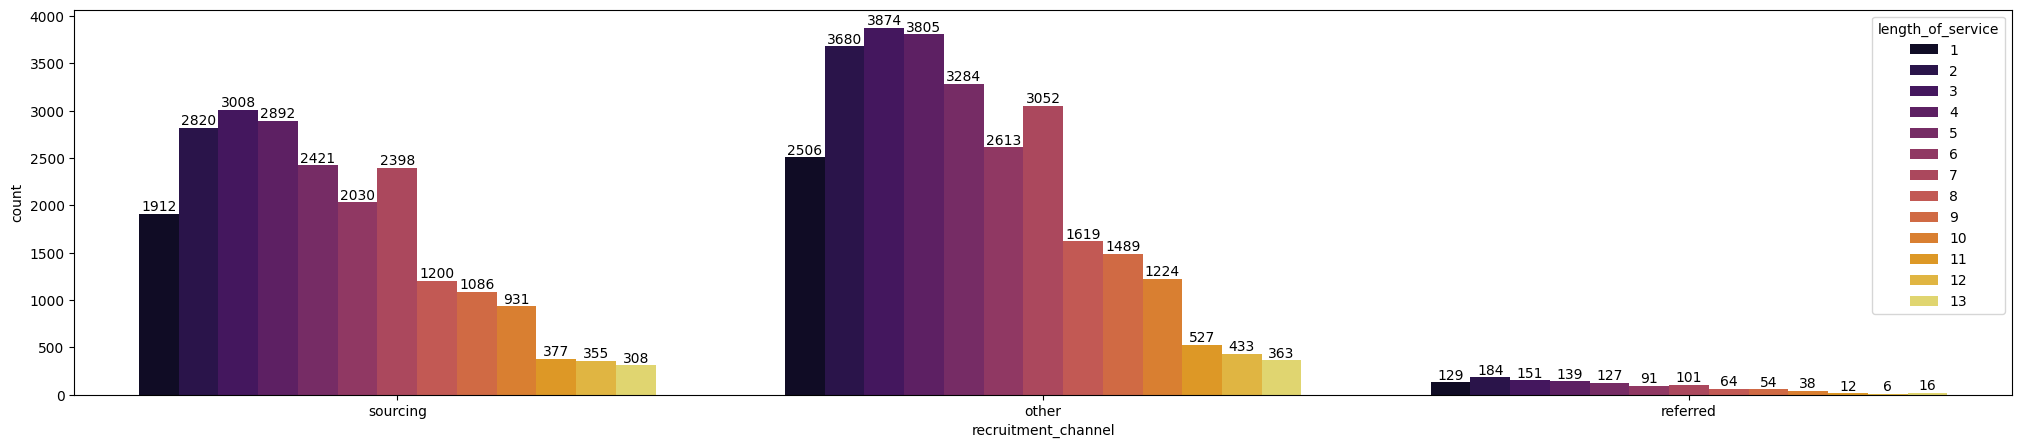

In [29]:
plt.figure(figsize=(25,5))
ax=sns.countplot(data=df_train,x='recruitment_channel',hue='length_of_service',palette='inferno')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='length_of_service'>

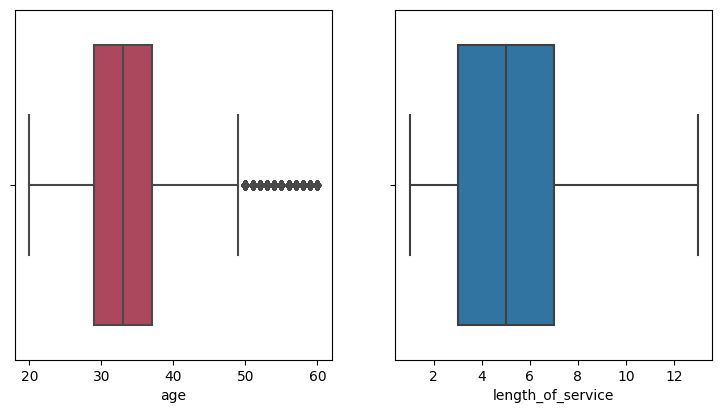

In [30]:
plt.figure(figsize=(9,10))
fig_dimns = (2,2)

plt.subplot2grid(fig_dimns,(0,0))
sns.boxplot(data=df_train, x=df_train.age,palette='inferno')

plt.subplot2grid(fig_dimns,(0,1))
sns.boxplot(data=df_train, x=df_train.length_of_service)

## Remove outliear in age column using Percentile

In [31]:
lower_limit, higher_limit = np.percentile(df_train.age,[0, 98])
print(lower_limit,higher_limit)

20.0 53.0


In [32]:
outliear = df_train[(df_train.age > higher_limit) | (df_train.age < lower_limit)]
outliear.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
29601,11918,Procurement,region_7,Master's & above,m,sourcing,1,59,3.0,3,0,74,1
32100,24239,Analytics,region_2,Bachelor's,m,sourcing,1,60,3.0,7,0,82,0
14971,11582,Procurement,region_17,Bachelor's,f,other,1,55,4.0,11,0,73,0
28876,48391,Sales & Marketing,region_7,Bachelor's,m,other,1,60,1.0,4,0,49,0
25790,33968,Operations,region_2,Master's & above,f,sourcing,1,58,4.0,5,0,59,0


In [33]:
df_train = df_train[(df_train.age > lower_limit) & (df_train.age < higher_limit)]

In [34]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [35]:
print(df_train.department.unique())
print(df_train.recruitment_channel.unique())
print(df_train.gender.unique())
print(df_train.education.unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['sourcing' 'other' 'referred']
['f' 'm']
["Master's & above" "Bachelor's" 'Below Secondary']


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['department'] = le.fit_transform(df_train['department'])


df_train['recruitment_channel'] = le.fit_transform(df_train['recruitment_channel'])


df_train['gender'] = le.fit_transform(df_train['gender'])


df_train['education'] = le.fit_transform(df_train['education'])


In [37]:
# recruitment_channel
# sourcing - 2
# other - 0
# refferd - 1

# education
# Bachelor's - 0
# Below Secondary - 1
# Master's & above - 2

# gender
# male - 1
# female - 0

# 0 - Analytics
# 1 - Finance
# 2 - HR
# 3 - Legal
# 4 - Operations
# 5 - Procurement
# 6 - R&D
# 7 - Sales & Marketing
# 8 - Technology

df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,region_22,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,region_19,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,region_23,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,region_26,0,1,0,1,45,3.0,2,0,73,0


In [38]:
df_train = df_train.drop(['employee_id','region'],axis=1)

In [39]:
x = df_train.drop(['is_promoted'], axis=1)
y = df_train['is_promoted']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40070, 10)
(40070,)
(10018, 10)
(10018,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9920638881956576
0.9270313435815533


Text(50.722222222222214, 0.5, 'predicted')

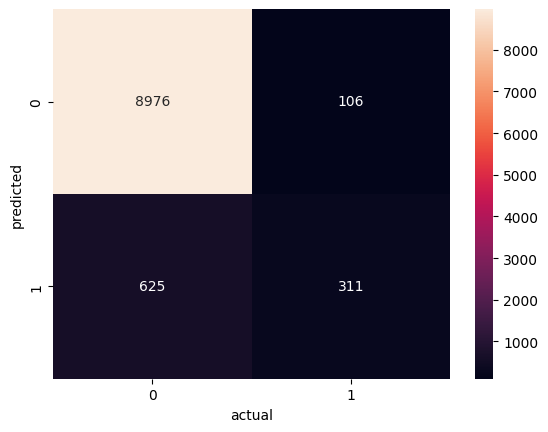

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('actual')
plt.ylabel('predicted')

In [43]:
import joblib
with open('employee model','wb') as f:
    joblib.dump(model,f)

In [44]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# my_pipeline = Pipeline([
#     ('classifier',RandomForestClassifier())
# ])

In [45]:
# model = my_pipeline.fit(X_train,y_train)
# print(model)

In [46]:
# from sklearn.metrics import mean_squared_error
# print(math.sqrt(mean_squared_error(y_test,y_pred)))

In [47]:
# import joblib
# with open('E:\Data Science\employee model','rb') as f:
#     model=joblib.load(f)